In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp.integrate.trapezoid?
sp.integrate.simpson?

Signature: sp.integrate.simpson(y, *, x=None, dx=1.0, axis=-1)
Docstring:
Integrate y(x) using samples along the given axis and the composite
Simpson's rule. If x is None, spacing of dx is assumed.

If there are an even number of samples, N, then there are an odd
number of intervals (N-1), but Simpson's rule requires an even number
of intervals. The parameter 'even' controls how this is handled.

Parameters
----------
y : array_like
    Array to be integrated.
x : array_like, optional
    If given, the points at which `y` is sampled.
dx : float, optional
    Spacing of integration points along axis of `x`. Only used when
    `x` is None. Default is 1.
axis : int, optional
    Axis along which to integrate. Default is the last axis.

Returns
-------
float
    The estimated integral computed with the composite Simpson's rule.

See Also
--------
quad : adaptive quadrature using QUADPACK
fixed_quad : fixed-order Gaussian quadrature
dblquad : double integrals
tplquad : triple integrals
romb

In [3]:
np.polynomial.legendre.leggauss?

Signature: np.polynomial.legendre.leggauss(deg)
Docstring:
Gauss-Legendre quadrature.

Computes the sample points and weights for Gauss-Legendre quadrature.
These sample points and weights will correctly integrate polynomials of
degree :math:`2*deg - 1` or less over the interval :math:`[-1, 1]` with
the weight function :math:`f(x) = 1`.

Parameters
----------
deg : int
    Number of sample points and weights. It must be >= 1.

Returns
-------
x : ndarray
    1-D ndarray containing the sample points.
y : ndarray
    1-D ndarray containing the weights.

Notes
-----

.. versionadded:: 1.7.0

The results have only been tested up to degree 100, higher degrees may
be problematic. The weights are determined by using the fact that

.. math:: w_k = c / (L'_n(x_k) * L_{n-1}(x_k))

where :math:`c` is a constant independent of :math:`k` and :math:`x_k`
is the k'th root of :math:`L_n`, and then scaling the results to get
the right value when integrating 1.
File:      ~/Dropbox/2024/E2/DASHBOARDs/no

In [11]:
N = 3
x,w = sp.special.roots_legendre(N)

In [12]:
def gauss_xw_ab(N,a,b):
    x,w = sp.special.roots_legendre(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [13]:
def f(x):
    return x**2 + 4*x + 2

def f2(x):
    return (np.e**x)*(np.cos(x))

def f3(x):
    return np.sin(1/x)

In [21]:
N = 30
a = 0
b = 1

x, w = gauss_xw_ab(N,a,b)

In [22]:
w

array([0.0039841 , 0.00923323, 0.01439235, 0.0193996 , 0.02420134,
       0.02874658, 0.03298711, 0.03687799, 0.04037795, 0.04344989,
       0.04606126, 0.04818437, 0.04979671, 0.05088119, 0.05142633,
       0.05142633, 0.05088119, 0.04979671, 0.04818437, 0.04606126,
       0.04344989, 0.04037795, 0.03687799, 0.03298711, 0.02874658,
       0.02420134, 0.0193996 , 0.01439235, 0.00923323, 0.0039841 ])

In [23]:
x

array([0.00155326, 0.00816594, 0.01998907, 0.03689998, 0.05871973,
       0.08521712, 0.11611128, 0.15107475, 0.18973691, 0.23168793,
       0.27648312, 0.32364764, 0.37268154, 0.42306504, 0.47426408,
       0.52573592, 0.57693496, 0.62731846, 0.67635236, 0.72351688,
       0.76831207, 0.81026309, 0.84892525, 0.88388872, 0.91478288,
       0.94128027, 0.96310002, 0.98001093, 0.99183406, 0.99844674])

In [24]:
def CuadGauss(N,f,a,b):
    S = 0
    
    w,x = gauss_xw_ab(N,a,b)
    
    for i in range(N):
        S = S + w[i]*f(x[i])
        
    return S

In [25]:
N = 30
a = 0
b = 1

CuadGauss(N,f,w,x)

24.355225657394794

In [68]:
N = 3
a = 0.0
b = 2.0

# Calculate the sample points and weights,then map them
# to the required integration domain

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

<BarContainer object of 30 artists>

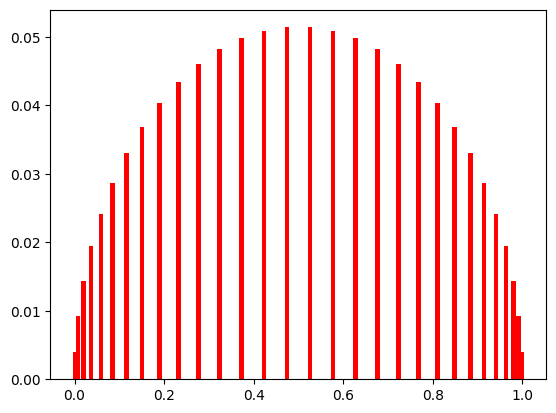

In [28]:
N = 30
a = 0
b = 1

xp, wp = gauss_xw_ab(N,a,b)

# plt.plot(xp,wp,'b.')
plt.bar(xp,wp, color ='red', width = 0.01)

<BarContainer object of 500 artists>

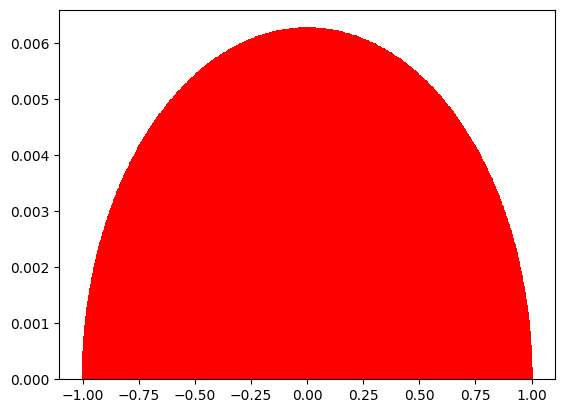

In [29]:
N = 500
a = -1.0
b = 1.0
xp, wp = gauss_xw_ab(N,a,b)

# plt.plot(xp,wp,'b.')
plt.bar(xp,wp, color ='red', width = 0.01)

In [ ]:
# plt.plot(xp,wp,'b.')
plt.bar(xp,wp, color ='red', width = 0.01)

In [80]:
s

1.933421496200713